<a href="https://colab.research.google.com/github/camilaslins/ML_Thyroid_Disease/blob/main/MD_doenca_tireoide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 💻 Projeto Mineração de Dados
dataset: Thyroid Disease



### 🤔 Compreensão do Negócio

####➡️ Objetivo de Negócio

Segundo a Organização Mundial da Saúde (OMS), cerca de 750 milhões de pessoas em todo o mundo sofrem de alguma patologia da tireoide, sendo a patologia mais comum o hipotireoidismo. Essa patologia se caracteriza pela queda na produção dos hormônios T3 (triiodotironina) e T4 (tiroxina) e os sintomas associados a mesma incluem fadiga, ganho de peso, sensação de frio, pele seca, constipação, entre outros. Para esse trabalho, foi utilizado o dataset de hipotireoidismo disponível no kaggle, O dataset contém informações suficientes para a classificação dessa doença com a utilização de algortimos clássicos de aprendizagem e também algoritmos de classificação profunda.

####➡️ Objetivo de Mineração
Os dados do dataset passarão por um pré processamento para a limpeza e normalização desses dados, e em seguida serão usados algoritmos de classificação. Na revisão da literatura feita no trabalho 'Thyroid Disease Classification Using Machine Learning Algorithms' (Khalid salman and Emrullah Sonuç, 2021), os algoritmos Decision Tree, SVM, Random Forest, Naive Bayes, Logistic Regression, Linear Discriminant Analysis, KNeighbors Classifier e MLP foram indicados como os mais utilizados nas pesquisas. Por esse motivo usaremos esses classificadores nesse trabalho.

<br>
Khalid salman and Emrullah Sonuç 2021 J. Phys.: Conf. Ser. 1963 012140
DOI 10.1088/1742-6596/1963/1/012140

####➡️ Critério de Sucesso da Mineração
No mesmo artigo citado a cima, a acurácia de todos os algortimos utilizados foi acima de 90% (exceto apenas pleo naive bayes), essa métrica então será nosso critério de sucesso.

#### 🔁 Conectando o Google Colab ao Google Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 📚 Importando as bibliotecas necessárias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

### 📂 Abrindo o arquivo

##### Informações gerais do dataset:
##### Garavan Institute, Australia
##### Proprietário: Ross Quinlan
##### 3772 dados

In [ ]:
df = pd.read_csv("/content/hypothyroid.csv")
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


### 🎲 Compreensão dos dados
####*(Análise Exploratória dos Dados)*

In [ ]:
df.describe().T

,count,unique,top,freq
age,3772,94,59,95
sex,3772,3,F,2480
on thyroxine,3772,2,f,3308
query on thyroxine,3772,2,f,3722
on antithyroid medication,3772,2,f,3729
sick,3772,2,f,3625
pregnant,3772,2,f,3719
thyroid surgery,3772,2,f,3719
I131 treatment,3772,2,f,3713
query hypothyroid,3772,2,f,3538


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [ ]:
df["binaryClass"].value_counts()

P    3481
N     291
Name: binaryClass, dtype: int64

In [ ]:
df["binaryClass"]=df["binaryClass"].replace({"P":0,"N":1})

Text(0.5, 1.0, 'Variável alvo')

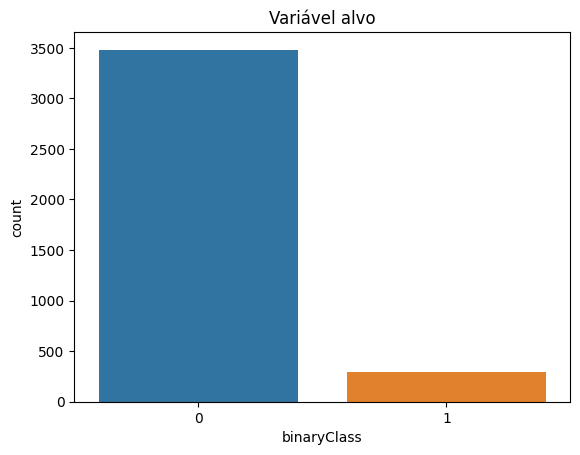

In [ ]:
sns.countplot(x='binaryClass', data=df)
plt.title("Variável alvo")

In [ ]:
df=df.replace({"t":1,"f":0})
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,0,0,0,0,0,0,0,0,...,1,125,1,1.14,1,109,0,?,SVHC,0
1,23,F,0,0,0,0,0,0,0,0,...,1,102,0,?,0,?,0,?,other,0
2,46,M,0,0,0,0,0,0,0,0,...,1,109,1,0.91,1,120,0,?,other,0
3,70,F,1,0,0,0,0,0,0,0,...,1,175,0,?,0,?,0,?,other,0
4,70,F,0,0,0,0,0,0,0,0,...,1,61,1,0.87,1,70,0,?,SVI,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,0,0,0,0,0,0,0,0,...,0,?,0,?,0,?,0,?,other,0
3768,68,F,0,0,0,0,0,0,0,0,...,1,124,1,1.08,1,114,0,?,SVI,0
3769,74,F,0,0,0,0,0,0,0,0,...,1,112,1,1.07,1,105,0,?,other,0
3770,72,M,0,0,0,0,0,0,0,0,...,1,82,1,0.94,1,87,0,?,SVI,0


In [ ]:
df["referral source"].value_counts()

other    2201
SVI      1034
SVHC      386
STMW      112
SVHD       39
Name: referral source, dtype: int64

In [ ]:
df=df.replace({"?":np.NAN})

In [ ]:
df.isnull().sum()

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
binaryClass   

In [ ]:
df=df.replace({"F":1,"M":0})

In [ ]:
df_positivo = df[df['binaryClass'] == 0]

In [ ]:
df_positivo

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,1.0,0,0,0,0,0,0,0,0,...,1,125,1,1.14,1,109,0,NaN,SVHC,0
1,23,1.0,0,0,0,0,0,0,0,0,...,1,102,0,NaN,0,NaN,0,NaN,other,0
2,46,0.0,0,0,0,0,0,0,0,0,...,1,109,1,0.91,1,120,0,NaN,other,0
3,70,1.0,1,0,0,0,0,0,0,0,...,1,175,0,NaN,0,NaN,0,NaN,other,0
4,70,1.0,0,0,0,0,0,0,0,0,...,1,61,1,0.87,1,70,0,NaN,SVI,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,1.0,0,0,0,0,0,0,0,0,...,0,NaN,0,NaN,0,NaN,0,NaN,other,0
3768,68,1.0,0,0,0,0,0,0,0,0,...,1,124,1,1.08,1,114,0,NaN,SVI,0
3769,74,1.0,0,0,0,0,0,0,0,0,...,1,112,1,1.07,1,105,0,NaN,other,0
3770,72,0.0,0,0,0,0,0,0,0,0,...,1,82,1,0.94,1,87,0,NaN,SVI,0


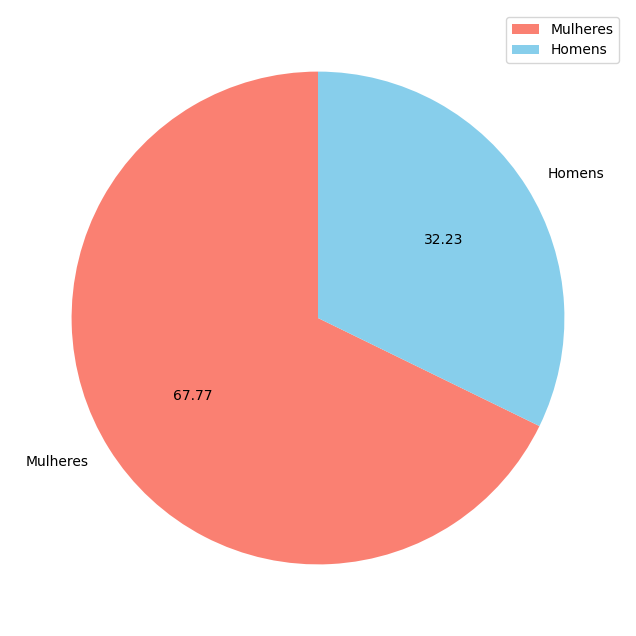

In [ ]:
plt.figure(figsize=(10,8))
plt.pie(x=df_positivo.sex.value_counts(),
        labels=['Mulheres','Homens'],
        startangle = 90,
        colors=['#FA8072','skyblue'],
        autopct='%.2f'
       );
plt.legend();

### 📈 Preparação dos Dados

In [ ]:
df.dtypes

age                           object
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                           object
T3 measured                    int64
T3                            object
TT4 measured                   int64
TT4                           object
T4U measured                   int64
T4U                           object
FTI measured                   int64
FTI                           object
TBG measured                   int64
T

In [ ]:
cols = df.columns[df.dtypes.eq('object')]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df.dtypes

age                          float64
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
TBG measured                   int64
T

In [ ]:
df.isnull().sum()

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source              3772
binaryClass   

In [ ]:
del df["TBG"]

In [ ]:
del df["referral source"]

In [ ]:
df['sex'].fillna(df['sex'].mean(), inplace=True)

In [ ]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [ ]:
df["T3 measured"].value_counts()

1    3003
0     769
Name: T3 measured, dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [ ]:
df['TSH'] = imputer.fit_transform(df[['TSH']])

In [ ]:
df['T3'] = imputer.fit_transform(df[['T3']])

In [ ]:
df['TT4'] = imputer.fit_transform(df[['TT4']])

In [ ]:
df['T4U'] = imputer.fit_transform(df[['T4U']])

In [ ]:
df['FTI'] = imputer.fit_transform(df[['FTI']])

In [ ]:
df.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
binaryClass                  0
dtype: int64

In [ ]:
sns.set(rc={'figure.figsize': [6, 6]}, font_scale=1.2)

<ipython-input-36-7452d86f8334>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

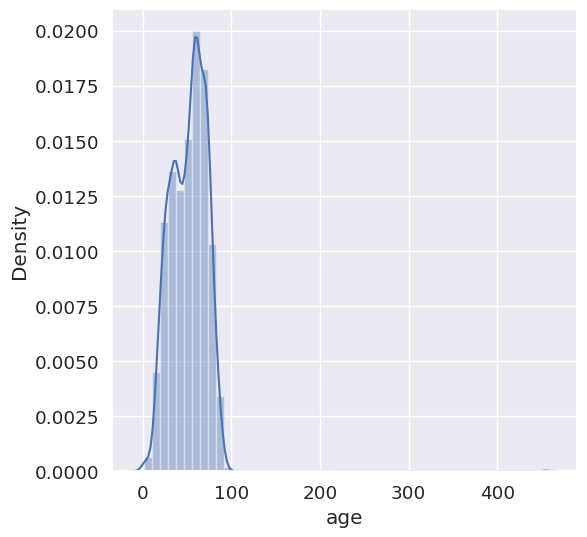

In [ ]:
sns.distplot(df['age'])

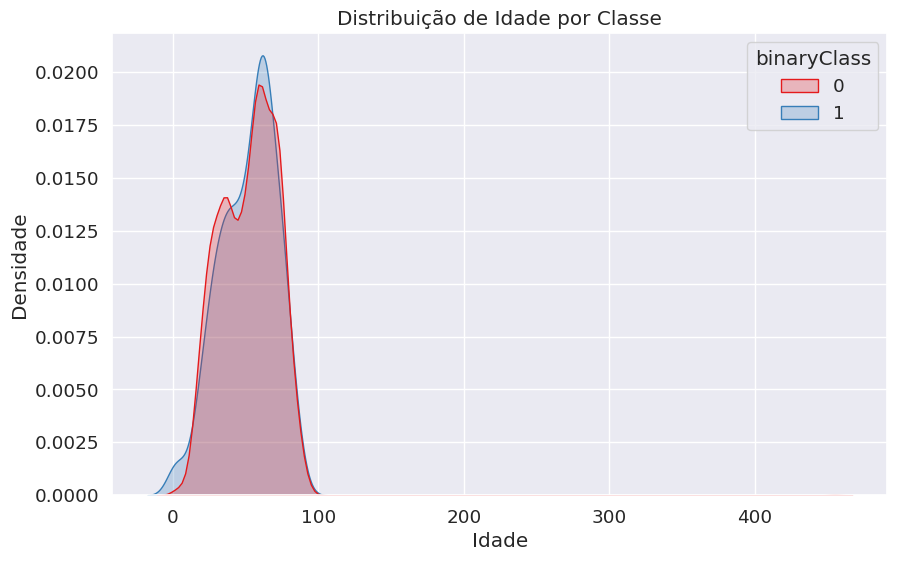

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de densidade para a distribuição de idade por classe
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='age', hue='binaryClass', fill=True, common_norm=False, palette='Set1')

# Adicionar rótulos e título ao gráfico
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.title('Distribuição de Idade por Classe')

# Mostrar o gráfico
plt.show()


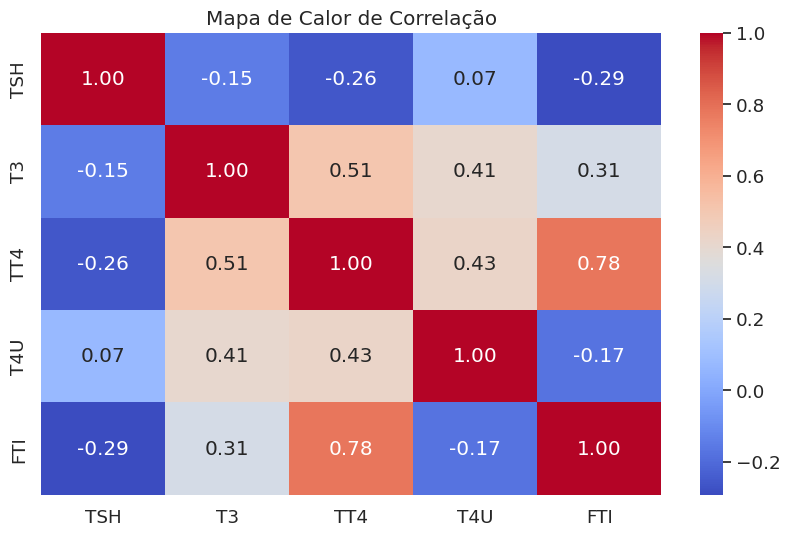

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar colunas relevantes para o mapa de calor de correlação
correlation_columns = df[['TSH', 'T3', 'TT4', 'T4U', 'FTI']]

# Calcular a matriz de correlação
correlation_matrix = correlation_columns.corr()

# Criar o mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Adicionar título ao gráfico
plt.title('Mapa de Calor de Correlação')

# Mostrar o gráfico
plt.show()


Os hormônios TT4 e FTI têm uma correlação mais forte forte. Isso significa que esses dois hormônios estão intimamente relacionados. Uma mudança em um desses hormônios provavelmente levará a uma mudança no outro. Os hormônios TT3 e TT4 também têm uma correlação forte. No entanto, essa correlação é um pouco mais fraca. <br>
É importante notar que a correlação não implica causalidade. Apenas porque dois hormônios estão correlacionados não significa que um cause o outro. É possível que ambos os hormônios sejam afetados por um terceiro fator. <br>
A correlação fraca entre TSH e FTI pode ser causada pelo fato de que ambos os hormônios estão envolvidos no controle da glândula tireoide. Quando o TSH está alto, a tireoide aumenta a produção de T3 e T4.

### 📊 Modelagem

In [ ]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
0,41.0,1.0,0,0,0,0,0,0,0,0,...,1,2.5000,1,125.0,1,1.140,1,109.000000,0,0
1,23.0,1.0,0,0,0,0,0,0,0,0,...,1,2.0000,1,102.0,0,0.995,0,110.469649,0,0
2,46.0,0.0,0,0,0,0,0,0,0,0,...,0,2.0135,1,109.0,1,0.910,1,120.000000,0,0
3,70.0,1.0,1,0,0,0,0,0,0,0,...,1,1.9000,1,175.0,0,0.995,0,110.469649,0,0
4,70.0,1.0,0,0,0,0,0,0,0,0,...,1,1.2000,1,61.0,1,0.870,1,70.000000,0,0


In [ ]:
y=df['binaryClass']
x=df.drop(['binaryClass'],axis=1)


Esse trecho de código separa seu conjunto de dados em duas partes:

y=data['binaryClass']: Aqui, você está atribuindo à variável y a coluna 'binaryClass' do seu conjunto de dados. Isso geralmente significa que você está interessado em prever ou analisar a variável-alvo 'binaryClass'. A variável y agora contém os rótulos de classe que você deseja prever ou analisar.

x=data.drop(['binaryClass'], axis=1): Aqui, você está atribuindo à variável x o conjunto de dados excluindo a coluna 'binaryClass'. A variável x agora contém todas as outras características (ou variáveis independentes) que você pode usar para prever ou analisar a variável-alvo 'binaryClass'.

Essa é uma prática comum na preparação de dados para modelos de aprendizado de máquina, onde você separa as variáveis de entrada (características) da variável de saída (rótulos ou variável-alvo). Isso permite que você use x para treinar um modelo de aprendizado de máquina e y para avaliar o desempenho do modelo ou fazer previsões.

Por exemplo, se você estiver usando um modelo de classificação, x conterá os recursos do seu conjunto de dados, e y conterá as classes associadas que você deseja prever.

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=42)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(3017, 27)
(755, 27)
(3017,)
(755,)


In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
smote = SMOTE(random_state=11)

x_smote, y_smote = smote.fit_resample(xtrain, ytrain)

In [ ]:
print("\nContagem de classes após o SMOTE:")
print(y_smote.value_counts())


Contagem de classes após o SMOTE:
0    2784
1    2784
Name: binaryClass, dtype: int64


#### Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier()

parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
}

grid_search_dt = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dt.fit(x_smote, y_smote)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'splitter': 'best'}

In [ ]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf = 2, min_samples_split = 3, splitter = 'best')
dtc.fit(x_smote, y_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=3)

In [ ]:
y_pred = dtc.predict(x_smote)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# accuracy score
print(accuracy_score(y_smote, dtc.predict(x_smote)))

dtc_acc = accuracy_score(ytest, dtc.predict(xtest))
print(dtc_acc)

0.9989224137931034
0.9973509933774835


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_pred, y_smote,digits=4))

              precision    recall  f1-score   support

           0     0.9982    0.9996    0.9989      2780
           1     0.9996    0.9982    0.9989      2788

    accuracy                         0.9989      5568
   macro avg     0.9989    0.9989    0.9989      5568
weighted avg     0.9989    0.9989    0.9989      5568



#### SVM

In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC()

parameters_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search_svm = GridSearchCV(svm_classifier, parameters_svm, cv=5, n_jobs=-1, verbose=1)
grid_search_svm.fit(x_smote, y_smote)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=1)

In [ ]:
best_params_svm = grid_search_svm.best_params_
print("Melhores parâmetros para SVM:", best_params_svm)

In [ ]:
svm_classifier = SVC(**best_params_svm)
svm_classifier.fit(x_smote, y_smote)

In [ ]:
# Fazer previsões e calcular a precisão
y_pred_svm = svm_classifier.predict(x_smote)
accuracy_svm_t = accuracy_score(y_smote, y_pred_svm)
print("Precisão do SVM no conjunto de treinamento SMOTE:", accuracy_svm_t)

y_pred_svm = svm_classifier.predict(x_smote)
accuracy_svm = accuracy_score(y_smote, y_pred_svm)
print("Precisão do SVM no conjunto de teste SMOTE:", accuracy_svm)

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()

parameters_rf = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search_rf = GridSearchCV(rf_classifier, parameters_rf, cv=5, n_jobs=-1, verbose=1)

grid_search_rf.fit(x_smote, y_smote)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [ ]:
best_params_rf = grid_search_rf.best_params_
print("Melhores parâmetros para Random Forest:", best_params_rf)

Melhores parâmetros para Random Forest: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
rf_classifier = RandomForestClassifier(**best_params_rf)
rf_classifier.fit(x_smote, y_smote)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=50)

In [ ]:
# Fazer previsões e calcular a precisão
y_pred_rf = rf_classifier.predict(x_smote)
accuracy_rf_t = accuracy_score(y_smote, y_pred_rf)
print("Precisão do Random Forest no conjunto de treinamento :", accuracy_rf_t)

y_pred_rf = rf_classifier.predict(xtest)
accuracy_rf = accuracy_score(ytest, y_pred_rf)
print("Precisão do Random Forest no conjunto de teste:", accuracy_rf)

Precisão do Random Forest no conjunto de treinamento : 0.9992816091954023
Precisão do Random Forest no conjunto de teste: 0.9986754966887417


In [ ]:
print(classification_report(ytest, y_pred_rf, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9986    0.9993       697
           1     0.9831    1.0000    0.9915        58

    accuracy                         0.9987       755
   macro avg     0.9915    0.9993    0.9954       755
weighted avg     0.9987    0.9987    0.9987       755



####KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Inicializar o classificador KNN
knn_classifier = KNeighborsClassifier()

# Definir os parâmetros para busca em grade
parameters_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Criar um objeto GridSearchCV para KNN
grid_search_knn = GridSearchCV(knn_classifier, parameters_knn, cv=5, n_jobs=-1, verbose=1)

# Aplicar Grid Search ao conjunto de treinamento SMOTE
grid_search_knn.fit(x_smote, y_smote)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [ ]:
best_params_knn = grid_search_knn.best_params_
print("Melhores parâmetros para KNN:", best_params_knn)

Melhores parâmetros para KNN: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}


In [ ]:
knn_classifier = KNeighborsClassifier(**best_params_knn)
knn_classifier.fit(x_smote, y_smote)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [ ]:
# Fazer previsões e calcular a precisão
y_pred_knn = knn_classifier.predict(x_smote)
accuracy_knn_t = accuracy_score(y_smote, y_pred_knn)
print("Precisão do KNN no conjunto de treinamento:", accuracy_knn_t)

y_pred_knn = knn_classifier.predict(xtest)
accuracy_knn = accuracy_score(ytest, y_pred_knn)
print("Precisão do KNN no conjunto de teste:", accuracy_knn)

Precisão do KNN no conjunto de treinamento: 1.0
Precisão do KNN no conjunto de teste: 0.937748344370861


In [ ]:
print(classification_report(ytest, y_pred_knn,digits=4))

              precision    recall  f1-score   support

           0     0.9765    0.9555    0.9659       697
           1     0.5753    0.7241    0.6412        58

    accuracy                         0.9377       755
   macro avg     0.7759    0.8398    0.8036       755
weighted avg     0.9457    0.9377    0.9410       755



####Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(x_smote, y_smote)

# Fazer previsões e calcular a precisão
y_pred_nb = nb_classifier.predict(x_smote)
accuracy_nb_t = accuracy_score(y_smote, y_pred_nb)
print("Precisão do Naive Bayes no conjunto de treinamento:", accuracy_nb_t)

y_pred_nb = nb_classifier.predict(xtest)
accuracy_nb = accuracy_score(ytest, y_pred_nb)
print("Precisão do Naive Bayes no conjunto de teste:", accuracy_nb)


Precisão do Naive Bayes no conjunto de treinamento: 0.6936063218390804
Precisão do Naive Bayes no conjunto de teste: 0.45695364238410596


####Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression()

parameters_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs']
}

grid_search_lr = GridSearchCV(lr_classifier, parameters_lr, cv=5, n_jobs=-1, verbose=1)

grid_search_lr.fit(x_smote, y_smote)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']},
             verbose=1)

In [ ]:
best_params_lr = grid_search_lr.best_params_
print("Melhores parâmetros para Logistic Regression:", best_params_lr)

Melhores parâmetros para Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
lr_classifier = LogisticRegression(**best_params_lr)
lr_classifier.fit(x_smote, y_smote)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [ ]:
# Fazer previsões e calcular a precisão
y_pred_lr = lr_classifier.predict(x_smote)
accuracy_lr_t = accuracy_score(y_smote, y_pred_lr)
print("Precisão do Logistic Regression no conjunto de treinamento:", accuracy_lr_t)

y_pred_lr = lr_classifier.predict(xtest)
accuracy_lr = accuracy_score(ytest, y_pred_lr)
print("Precisão do Logistic Regression no conjunto de teste:", accuracy_lr)


Precisão do Logistic Regression no conjunto de treinamento: 0.990301724137931
Precisão do Logistic Regression no conjunto de teste: 0.976158940397351


In [ ]:
print(classification_report(ytest, y_pred_lr,digits=4))

              precision    recall  f1-score   support

           0     0.9971    0.9770    0.9870       697
           1     0.7778    0.9655    0.8615        58

    accuracy                         0.9762       755
   macro avg     0.8874    0.9713    0.9242       755
weighted avg     0.9802    0.9762    0.9773       755



Linear Discriminant Analysis (LDA)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_classifier = LinearDiscriminantAnalysis()

lda_classifier.fit(x_smote, y_smote)

# Fazer previsões e calcular a precisão
y_pred_lda = lda_classifier.predict(x_smote)
accuracy_lda_t = accuracy_score(y_smote, y_pred_lda)
print("Precisão do LDA no conjunto de treinamento:", accuracy_lda_t)

y_pred_lda = lda_classifier.predict(xtest)
accuracy_lda = accuracy_score(ytest, y_pred_lda)
print("Precisão do LDA no conjunto de test:", accuracy_lda)


Precisão do LDA no conjunto de treinamento: 0.8239942528735632
Precisão do LDA no conjunto de test: 0.7867549668874172


In [ ]:
print(classification_report(ytest, y_pred_lda,digits=4))

              precision    recall  f1-score   support

           0     0.9718    0.7920    0.8727       697
           1     0.2246    0.7241    0.3429        58

    accuracy                         0.7868       755
   macro avg     0.5982    0.7581    0.6078       755
weighted avg     0.9144    0.7868    0.8320       755



MLP (Multi-Layer Perceptron)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier()

parameters_mlp = {
    'hidden_layer_sizes': [(50, ), (100, ), (50, 50), (100, 50, 25)],
    'activation': ['logistic', 'tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [100, 200, 300]
}

grid_search_mlp = GridSearchCV(mlp_classifier, parameters_mlp, cv=5, n_jobs=-1, verbose=1)

grid_search_mlp.fit(x_smote, y_smote)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (100, 50, 25)],
                         'max_iter': [100, 200, 300]},
             verbose=1)

In [ ]:
best_params_mlp = grid_search_mlp.best_params_
print("Melhores parâmetros para MLP:", best_params_mlp)

Melhores parâmetros para MLP: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'max_iter': 200}


In [ ]:
mlp_classifier = MLPClassifier(**best_params_mlp)
mlp_classifier.fit(x_smote, y_smote)

MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=(50, 50))

In [ ]:
# Fazer previsões e calcular a precisão
y_pred_mlp = mlp_classifier.predict(x_smote)
accuracy_mlp_t = accuracy_score(y_smote, y_pred_mlp)
print("Precisão do MLP no conjunto de treinamento:", accuracy_mlp_t)

y_pred_mlp = mlp_classifier.predict(xtest)
accuracy_mlp = accuracy_score(ytest, y_pred_mlp)
print("Precisão do MLP no conjunto de teste:", accuracy_mlp)

Precisão do MLP no conjunto de treinamento: 0.9955100574712644
Precisão do MLP no conjunto de teste: 0.9801324503311258


In [ ]:
print(classification_report(ytest, y_pred_mlp,digits=4))

              precision    recall  f1-score   support

           0     0.9971    0.9813    0.9892       697
           1     0.8116    0.9655    0.8819        58

    accuracy                         0.9801       755
   macro avg     0.9043    0.9734    0.9355       755
weighted avg     0.9828    0.9801    0.9809       755



### 📋 Avaliação

Na etapa de modelagem, os dados foram particionados  em 20% para teste e 80% para treinamento.


In [ ]:
model_comparison = pd.DataFrame({
    'Modelo': ['Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes','Logistic Regression', 'LDA', 'MLP'],
    'Acuracia': [dtc_acc, accuracy_rf, accuracy_knn, accuracy_nb, accuracy_lr, accuracy_lda, accuracy_mlp]
})
model_comparison['Acuracia'] *= 100

In [ ]:
model_comparison

,Modelo,Acuracia
0,Decision Tree,99.735099
1,Random Forest,99.867550
2,KNN,93.774834
3,Naive Bayes,45.695364
4,Logistic Regression,97.615894
5,LDA,78.675497
6,MLP,98.013245


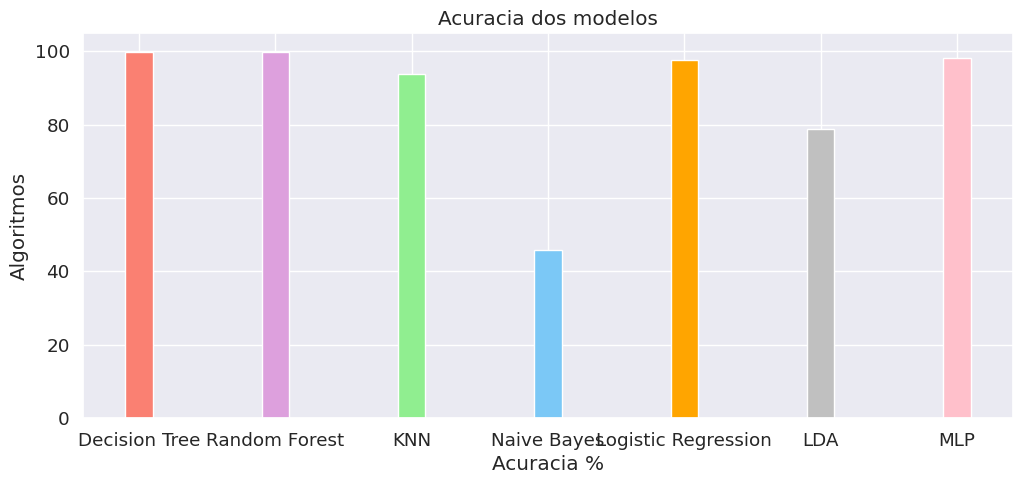

In [ ]:
colors = ['#FA8072','#DDA0DD','#90EE90','#7BC8F6','#FFA500','#C0C0C0','#FFC0CB']
plt.figure(figsize=(12,5))
plt.title("Acuracia dos modelos")
plt.xlabel("Acuracia %")
plt.ylabel("Algoritmos")
plt.bar(model_comparison['Modelo'],model_comparison['Acuracia'],color = colors, width=0.2)
plt.show()

#### Matriz de Confusão

Verdadeiros Positivos (TP): Este é o número de casos positivos que foram corretamente previstos pelo modelo. É um indicativo de sucesso na identificação dos casos positivos.

Falsos Positivos (FP): Estes são casos negativos que foram incorretamente previstos como positivos. Em alguns contextos, isso pode ser indesejável, pois representa erro ao indicar a presença da condição quando ela não está presente.

Verdadeiros Negativos (TN): Este é o número de casos negativos que foram corretamente previstos pelo modelo. É um indicativo de sucesso na identificação dos casos negativos.

Falsos Negativos (FN): Estes são casos positivos que foram incorretamente previstos como negativos. Em alguns contextos, isso pode ser crítico, pois representa falha ao identificar a presença da condição quando ela está presente.

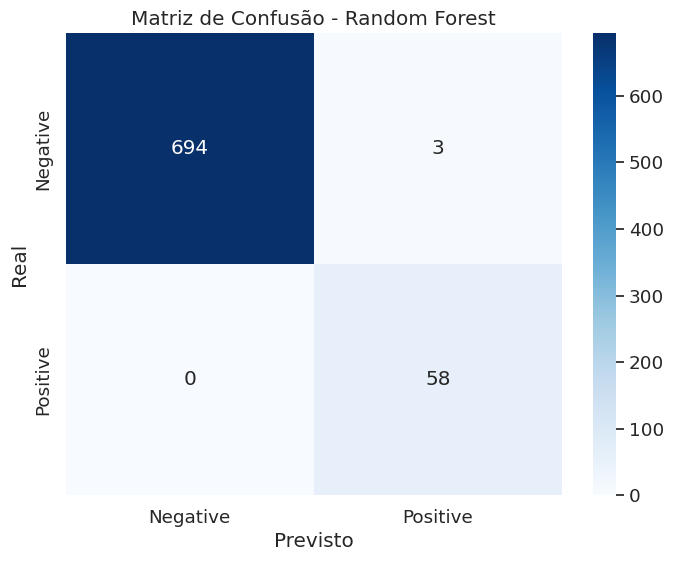

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_rf = grid_search_rf.predict(xtest)

# Calcular a matriz de confusão
conf_matrix_rf = confusion_matrix(ytest, y_pred_rf)

# Exibir a matriz de confusão usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()


Esta é uma matriz de confusão geralmente desejável, pois tem uma quantidade significativa de Verdadeiros Positivos (58) e Verdadeiros Negativos (694), indicando que o modelo está acertando tanto nos casos positivos quanto nos casos negativos. O baixo número de Falsos Positivos (3) e Falsos Negativos (0) sugere um bom desempenho do modelo.

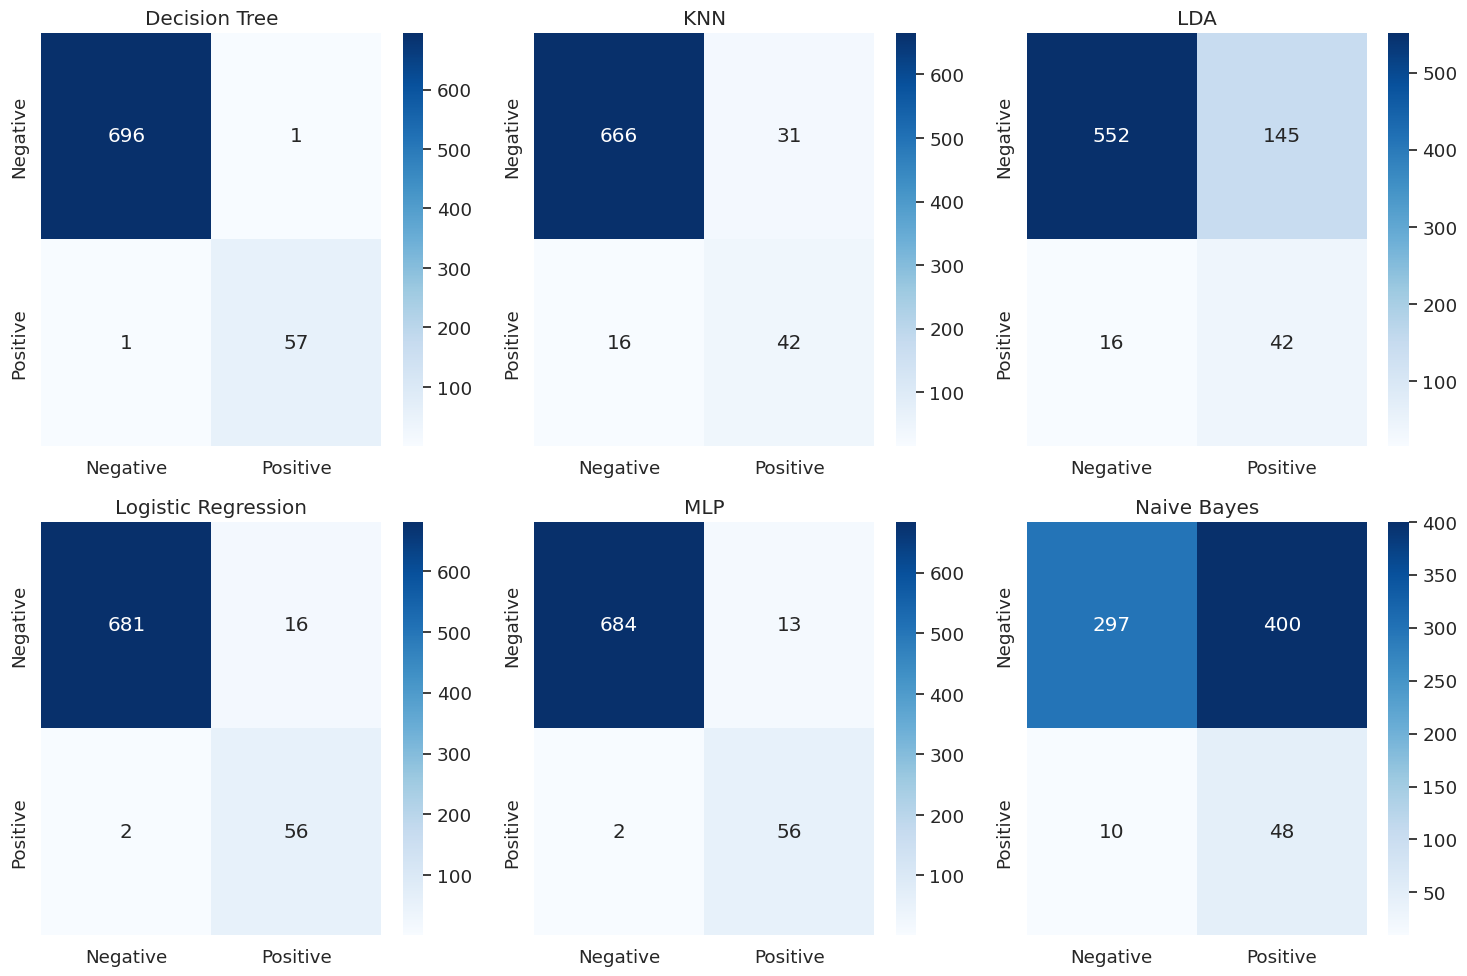

In [ ]:
# Decision Tree
y_pred_decision_tree = dtc.predict(xtest)
conf_matrix_decision_tree = confusion_matrix(ytest, y_pred_decision_tree)

# KNN
y_pred_knn = knn_classifier.predict(xtest)
conf_matrix_knn = confusion_matrix(ytest, y_pred_knn)

# Linear Discriminant Analysis (LDA)
y_pred_lda = lda_classifier.predict(xtest)
conf_matrix_lda = confusion_matrix(ytest, y_pred_lda)

# Logistic Regression
y_pred_lr = lr_classifier.predict(xtest)
conf_matrix_logistic = confusion_matrix(ytest, y_pred_lr)

# Multilayer Perceptron (MLP)
y_pred_mlp = mlp_classifier.predict(xtest)
conf_matrix_mlp = confusion_matrix(ytest, y_pred_mlp)

# Naive Bayes
y_pred_naive_bayes = nb_classifier.predict(xtest)
conf_matrix_naive_bayes = confusion_matrix(ytest, y_pred_naive_bayes)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Decision Tree
sns.heatmap(conf_matrix_decision_tree, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[0, 0])
axes[0, 0].set_title('Decision Tree')

# KNN
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[0, 1])
axes[0, 1].set_title('KNN')

# LDA
sns.heatmap(conf_matrix_lda, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[0, 2])
axes[0, 2].set_title('LDA')

# Logistic Regression
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[1, 0])
axes[1, 0].set_title('Logistic Regression')

# MLP
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[1, 1])
axes[1, 1].set_title('MLP')

# Naive Bayes
sns.heatmap(conf_matrix_naive_bayes, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[1, 2])
axes[1, 2].set_title('Naive Bayes')

plt.tight_layout()
plt.show()


O Naive Bayes parece ter um desempenho inferior em comparação com os outros, especialmente em termos de falsos positivos.

O Decision Tree e o Random Forest parecem ter desempenho relativamente bom, com uma quantidade muito baixa de falsos positivos e falsos negativos. Além disso esses algoritmos demonstraram a maior porcentagem de acurácia, logo são os melhores modelos resultados desse trabalho.